In [1]:
import pandas as pd

In [2]:
folder = "repos"

with open("repos.txt") as fil:
    all_repos=fil.readlines()

In [3]:
original_repos = [x.replace("\n","") for x in all_repos]
all_repos = [x.replace("\n","").replace("/","-") for x in all_repos]


In [4]:
import os
BASE_DIR = os.getcwd()


In [5]:
repo_data = {}

In [6]:

filename=BASE_DIR+"/"+folder+"/"+all_repos[0]+".csv"
df = pd.read_csv(filename)

repo_data[original_repos[0]]=[len(df),df.iloc[-1].commit_date]

df = df.drop(df.columns[0], axis=1)
df


,commit_author,commit_date
0,simminu,2021-10-05T08:02:27Z
1,simminu,2021-10-05T08:02:05Z
2,simminu,2021-10-05T07:57:46Z
3,simminu,2021-10-05T07:51:17Z
4,simminu,2021-10-05T07:44:54Z
5,simminu,2021-10-01T12:06:38Z
6,simminu,2021-09-23T06:03:48Z
7,simminu,2021-09-22T17:50:25Z
8,simminu,2021-09-22T17:48:44Z
9,simminu,2021-09-22T17:46:13Z


In [7]:
from os.path import exists

for i,repo in enumerate(all_repos[1:]):
    filename=BASE_DIR+"/"+folder+"/"+repo+".csv"
    if exists(filename):
        tmp_df = pd.read_csv(filename)
        tmp_df = tmp_df.drop(tmp_df.columns[0], axis=1)
        df = pd.concat([df,tmp_df] )
        repo_data[original_repos[i+1]]=[len(tmp_df),tmp_df.iloc[-1].commit_date]




In [8]:
df["commit_date"] = pd.to_datetime(df["commit_date"]) 

In [9]:
df = df.set_index("commit_date")
df = df.rename(columns={"commit_author":"commits"})
df.head()

,commits
commit_date,
2021-10-05 08:02:27+00:00,simminu
2021-10-05 08:02:05+00:00,simminu
2021-10-05 07:57:46+00:00,simminu
2021-10-05 07:51:17+00:00,simminu
2021-10-05 07:44:54+00:00,simminu


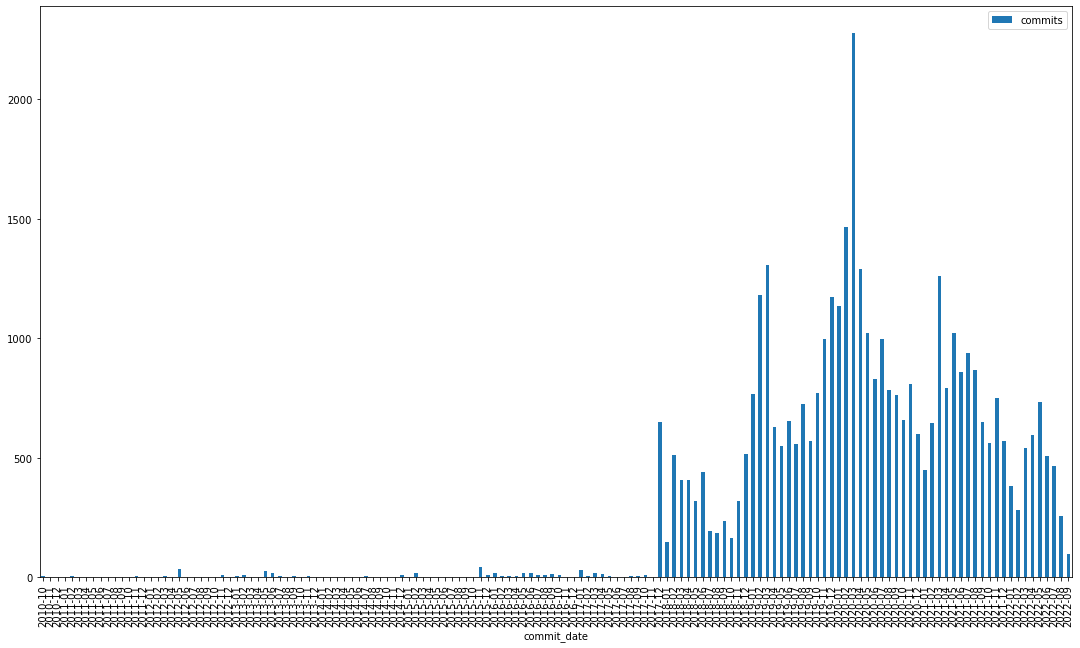

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime

resampled = df.resample("MS").count()


ax = resampled.plot(kind="bar")
locs, labels=plt.xticks()

ax.set_xticks(locs,[datetime.strftime(x,"%Y-%m") for x in list(resampled.index)])

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [12]:
!pip install peakdetect

In [13]:
import peakdetect

peaks = peakdetect.peakdetect(resampled.commits, resampled.index, lookahead=10)#, )#, lookahead, delta)

In [14]:
peaks[0]

[[Timestamp('2017-01-01 00:00:00+0000', tz='UTC', freq='MS'), 31],
 [Timestamp('2017-12-01 00:00:00+0000', tz='UTC', freq='MS'), 648],
 [Timestamp('2019-03-01 00:00:00+0000', tz='UTC', freq='MS'), 1305],
 [Timestamp('2020-03-01 00:00:00+0000', tz='UTC', freq='MS'), 2275],
 [Timestamp('2021-03-01 00:00:00+0000', tz='UTC', freq='MS'), 1258]]

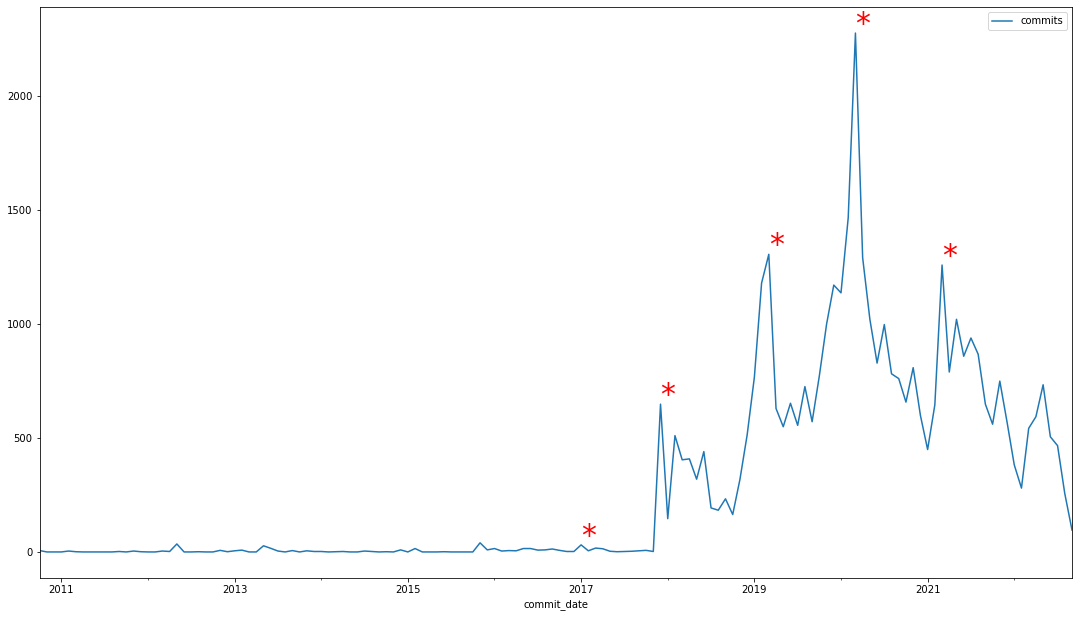

In [15]:

ax = resampled.plot()
locs, labels=plt.xticks()

for peak in peaks[0]:
    ax.annotate("*",xy=(peak[0],peak[1]), fontsize=30, color="red")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [16]:
repodata_df = pd.DataFrame.from_dict(repo_data, orient="index")
repodata_df.rename(columns={0:"commit_count",1:"first_commit_date"}, inplace=True)
repodata_df["first_commit_date"]=pd.to_datetime(repodata_df["first_commit_date"])

repodata_df


,commit_count,first_commit_date
simsimee/Faceswap_and_Deepfake_Detection,17,2021-08-12 02:43:02+00:00
carlosdamirand/Deepfake,3,2020-11-28 16:36:03+00:00
manncodes/Deepfake-of-Elon-Tweets,31,2020-07-02 14:20:28+00:00
pamintandrei/deepfakedetection_challange_kaggle,1,2020-10-13 13:04:01+00:00
alexhaislip/Deepfake_creation,2,2021-07-15 03:44:28+00:00
...,...,...
milkywaydiehard/Non-Fungible-Deepfakes,9,2022-05-21 19:01:04+00:00
movebrickeffort/Privacy-Preserving-DeepFake-Face-Image-Detection,6,2021-11-16 13:46:48+00:00
ForrestPi/faceXray,1,2020-02-19 07:56:16+00:00
mmkuznecov/Unsupervised_deepfake_image_analysis,4,2021-03-02 22:52:48+00:00


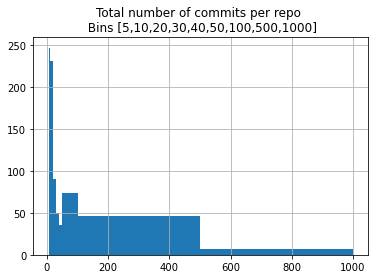

In [17]:
repodata_df.commit_count.hist(bins=[5,10,20,30,40,50,100,500,1000])
plt.title("Total number of commits per repo \n Bins [5,10,20,30,40,50,100,500,1000]")
plt.show()

In [18]:
repodata_df.sort_values(by="commit_count", ascending=False).head(25)

,commit_count,first_commit_date
deepfakes/faceswap,1626,2017-12-15 11:47:32+00:00
samq-research/deepfakes-faceswap,1562,2017-12-15 11:47:32+00:00
Joannaever/deepfakes,1411,2017-12-15 11:47:32+00:00
iperov/DeepFaceLab,1309,2018-06-04 13:10:00+00:00
sgg423/deepfakes,1309,2018-06-04 13:10:00+00:00
ekohendratno/deepfakes-faceswap,1306,2017-12-15 11:47:32+00:00
wjqhqzmd/deepfake,1219,2017-12-15 11:47:32+00:00
big-bombom/deepfake,990,2018-06-04 13:10:00+00:00
aakashpadhiyar/deepfake-live,985,2017-12-15 11:47:32+00:00
yfsin/deepfake_pro,985,2018-06-04 13:10:00+00:00


In [19]:
print("Total number of repos processed:",len(repodata_df))

Total number of repos processed: 1372
